In [1]:
import os
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
#load log資料夾中的一個pickle檔
#"../log/ml_EASY_1_2021-03-17_13-43-40.pickle"
with open("./log/P2(1).pickle", "rb") as file:
    data = pickle.load(file)
print(data)

{'record_format_version': 2, 'ml_1P': {'scene_info': [{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (40, 240)}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (45, 240)}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (50, 240)}, {'frame': 3, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (55, 240)}, {'frame': 4, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (60, 240)}, {'frame': 5, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (65, 240)}, {'frame': 6, 'status': 'GAME_ALIVE

In [3]:
#針對資料結構進行整理
game_info = data['ml_2P']['scene_info']
game_command = data['ml_2P']['command']
print(game_info)
print(game_command)

[{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (40, 240)}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (45, 240)}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (50, 240)}, {'frame': 3, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (55, 240)}, {'frame': 4, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (60, 240)}, {'frame': 5, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform_1P': (80, 420), 'platform_2P': (80, 50), 'blocker': (65, 240)}, {'frame': 6, 'status': 'GAME_ALIVE', 'ball': (98, 415), 'ball_speed': (0, 0), 'platform

In [4]:
#找特徵
g = game_info[1]

feature = np.array([g["ball"][0], g["ball"][1], g["ball_speed"][0], g["ball_speed"][1], g["platform_2P"][0]+15,80])
print(feature)
print(game_command[1])
game_command[1] = 0 #game_command[1]=0

[ 98 415   0   0  95  80]
None


In [5]:
for i in range(2, len(game_info) - 1):
    g = game_info[i]
    g_last = game_info[i-1]
    ball_x=g["ball"][0]
    ball_y=g["ball"][1]
    ball_vx=g['ball'][0] - g_last['ball'][0]
    ball_vy=g['ball'][1] - g_last['ball'][1]
    des_x = 80
    #if des_vy > 0:
    if ball_vy < 0:                                             #ball move up
                    if ball_vx < 0:                                         #ball move left
                        des_x = ball_x - (ball_y - 80)
                    else:                                                       #ball move right   
                        des_x = ball_x + (ball_y - 80)
    else:                                                           #ball move down  
                    if ball_vx < 0:                                         #ball move left
                        des_x = ball_x - (680 - (ball_y - 80))
                    else:                                                       #ball move right
                        des_x = ball_x + (680 - (ball_y - 80))
       
    while des_x > 200 or des_x < 0:
        if des_x > 200:
                des_x = 200 - (des_x - 200)
        else: 
                des_x = -des_x
    feature = np.vstack((feature, [g['ball'][0], g['ball'][1],ball_vx, ball_vy,g['platform_2P'][0]+15,des_x]))
    if game_command[i] == "NONE": game_command[i] = 0
    elif game_command[i] == "MOVE_LEFT": game_command[i] = 1
    else: game_command[i] = 2 
        
answer = np.array(game_command[1:-1])
print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[ 98 415   0   0  95  80]
 [ 98 415   0   0  95  43]
 [ 98 415   0   0  95  43]
 ...
 [174 407 -21  21 160 179]
 [160 428 -14  21 165 172]
 [181 449  21  21 165  92]]
(1646, 6)
[0 2 2 ... 2 0 1]
(1646,)


# RANDOM FOREST

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state = 0) #0.3 0
#參數區間
forest = RandomForestClassifier(n_estimators=195, max_depth=175) #195 175
forest = forest.fit(x_train, y_train)
predicted = forest.predict(x_test)

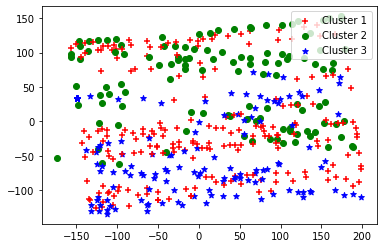

In [7]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(x_test)
pca_2d = pca.transform(x_test)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if predicted[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif predicted[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif predicted[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [8]:
print(answer,"\n")
print(predicted)

[0 2 2 ... 2 0 1] 

[0 0 0 0 0 1 2 0 1 2 0 1 0 0 2 2 0 2 2 1 1 1 0 0 2 1 2 2 1 0 2 1 0 2 0 2 1
 0 1 0 1 0 2 2 0 0 2 1 0 2 1 2 2 0 0 0 2 0 0 0 0 0 2 0 1 1 2 2 0 0 0 2 0 2
 0 1 1 0 1 1 0 0 2 1 2 0 2 2 2 1 0 2 2 0 2 0 0 1 1 0 0 0 2 1 1 0 1 2 2 0 0
 0 2 2 2 0 1 0 0 2 0 0 1 2 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 1 2 0 0 2 0 2 1 2
 1 2 0 1 2 2 0 2 0 2 0 0 2 1 2 2 0 2 1 0 2 0 0 2 1 2 2 1 2 0 0 0 0 0 0 0 0
 2 0 0 2 2 0 0 1 2 2 0 2 2 1 2 2 2 1 2 2 0 0 1 2 0 1 2 2 0 2 1 0 2 0 0 1 0
 2 1 0 2 0 0 2 2 0 1 2 0 2 1 2 1 1 0 1 2 0 0 1 0 2 0 0 2 1 1 2 1 0 0 2 0 0
 0 1 2 2 0 0 2 0 0 0 0 0 2 0 1 2 1 2 2 1 0 1 0 0 0 0 2 2 0 2 2 0 2 0 1 1 0
 2 0 1 2 2 0 1 2 0 1 0 0 0 0 1 2 0 0 2 0 2 1 2 2 2 1 0 1 0 1 0 0 1 2 0 1 1
 0 1 2 0 1 2 0 2 1 2 0 2 1 0 0 1 1 1 0 0 1 0 1 2 0 2 1 2 0 2 1 2 2 2 0 2 2
 2 2 2 0 1 0 0 0 0 0 1 0 0 1 0 0 2 1 0 2 0 2 1 1 0 0 0 0 0 2 0 2 0 1 1 0 2
 1 1 0 1 0 1 2 0 1 1 0 0 2 0 2 0 0 1 1 1 0 2 0 1 2 2 2 1 0 1 1 0 0 2 1 1 0
 2 2 0 2 1 2 0 2 2 0 1 0 0 1 1 2 0 0 2 0 2 1 2 0 0 0 0 1 0 0 2 1 0 2 2 2 2
 0 1 

In [9]:
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state = 0) #0.3 0
#參數區間
forest = RandomForestClassifier(n_estimators=195, max_depth=175) #195 175
forest = forest.fit(x_train, y_train)
predicted = forest.predict(x_test)
file = open("mine_model_random2.pickle", "wb")
pickle.dump(forest, file)
file.close()
print("Accuracy score (validation): {0:.3f}".format(forest.score(x_test, y_test)))
print("Confusion Matrix for Raandom Forests:")
print(confusion_matrix(y_test, predicted))
print()
print("Classification Report for Random Forests")
print(classification_report(y_test, predicted))

Accuracy score (validation): 0.955
Confusion Matrix for Raandom Forests:
[[199   5   2]
 [  9 111   0]
 [  6   0 162]]

Classification Report for Random Forests
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       206
           1       0.96      0.93      0.94       120
           2       0.99      0.96      0.98       168

    accuracy                           0.96       494
   macro avg       0.96      0.95      0.95       494
weighted avg       0.96      0.96      0.96       494



# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x = np.array(feature)
y = np.array(answer)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
predict_label = clf.predict(x_test)

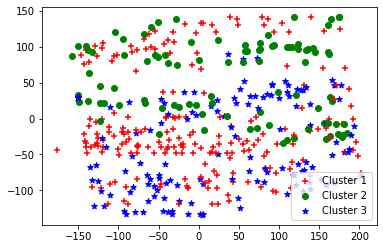

In [11]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_test)
pca_2d = pca.transform(x_test)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if predict_label[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif predict_label[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif predict_label[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix
#資料劃分
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)
#參數區間
param_grid = {'n_neighbors':[1, 2, 3]}
#交叉驗證 
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=-1) #n_jobs為平行運算的數量
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

# #儲存
# file = open('arkanoid_e3_20210309_knn_model.pickle', 'wb')
# pickle.dump(grid, file)
# file.close()

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    2.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    2.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.1s finished


In [13]:
#最佳參數
print(grid.best_params_)
#預測結果
#print(grid_predictions)
#混淆矩陣
print(confusion_matrix(y_test, grid_predictions))
#分類結果
print(classification_report(y_test, grid_predictions))

{'n_neighbors': 3}
[[169  14   9]
 [ 27  83   1]
 [ 17   0 174]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       192
           1       0.86      0.75      0.80       111
           2       0.95      0.91      0.93       191

    accuracy                           0.86       494
   macro avg       0.86      0.85      0.85       494
weighted avg       0.87      0.86      0.86       494



# Actual Label

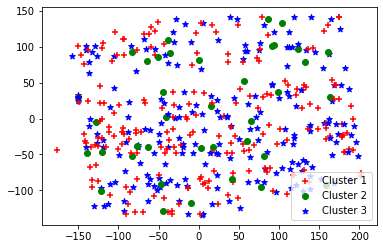

In [14]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(x_test)
pca_2d = pca.transform(x_test)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if answer[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif answer[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif answer[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()